In [1]:
import numpy as np
import cv2
from skimage.feature import hog
import matplotlib.image as mpimg
import glob
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.ndimage.measurements import label
%matplotlib inline


In [2]:
# Functions taken from Udacity

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features
    

def convert_color(img, conv='RGB2YUV'):
    if conv == 'RGB2YUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    elif conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    elif conv == 'RGB2HLS':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    elif conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    elif conv == 'RGB2HSV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    
def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))


def color_hist(img, nbins=32, bins_range=(0, 256)):
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    return hist_features

def add_heat(heatmap, bbox_list):
    for box in bbox_list:
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    return heatmap

def apply_threshold(heatmap, threshold):
    heatmap[heatmap <= threshold] = 0
    return heatmap

def draw_labeled_bboxes(img, labels):
    for car_number in range(1, labels[1]+1):
        nonzero = (labels[0] == car_number).nonzero()
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    return img

print("ll")


ll


/Users/psahay101/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
/Users/psahay101/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


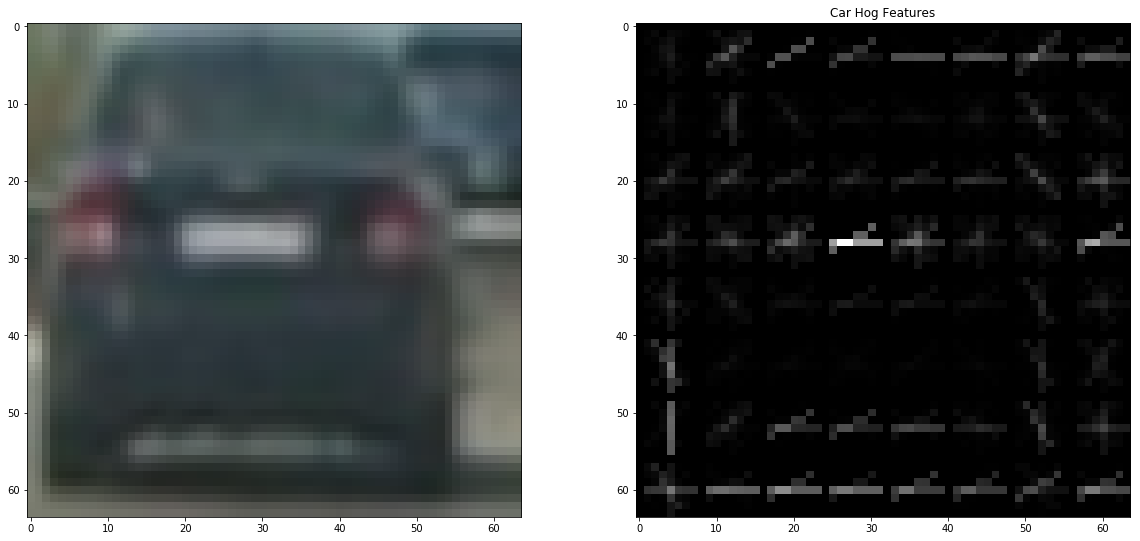

In [3]:
image = mpimg.imread('./vehicles/GTI_MiddleClose/image0000.png')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ORIENT = 8
PIX_PER_CELL = 8
CELL_PER_BLOCK = 2

features, hog_image = get_hog_features(gray, ORIENT, PIX_PER_CELL, CELL_PER_BLOCK, vis=True)

fig = plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.subplot(222).set_title('Car Hog Features')
plt.imshow(hog_image, cmap='gray')


In [4]:
#Taken from Udacity 
def extract_features(imgs, conv='RGB2YUV', orient=ORIENT, hog_channel=0,
                        pix_per_cell=PIX_PER_CELL, cell_per_block=CELL_PER_BLOCK,
                        spatial_size=(32, 32), hist_bins=32, hist_range=(0, 256)):
    
    features = []
    
    for file in imgs:
        
        img = mpimg.imread(file)
        
        img = convert_color(img, conv='RGB2YUV')      
        
        color_features = bin_spatial(img, size=spatial_size)
        
        hist_features = color_hist(img, nbins=hist_bins, bins_range=hist_range)
        
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(img.shape[2]):
                hog_features.append(get_hog_features(img[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(img[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        
        features.append(np.concatenate((color_features, hist_features, hog_features)))
    
    return features


In [5]:
cars = glob.glob('./vehicles/*/*.png')
notcars = glob.glob('./non-vehicles/*/*.png')
        
car_features = extract_features(cars, conv='RGB2YUV', hog_channel='ALL', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = extract_features(notcars, conv='RGB2YUV', hog_channel='ALL', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
print("ggg")


/Users/psahay101/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


ggg


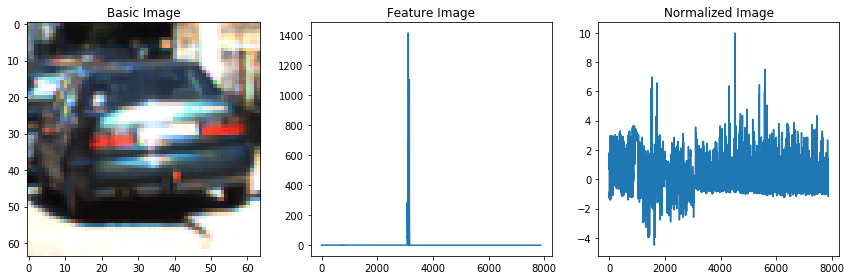

In [23]:
if len(car_features) > 0:
    # Make an array of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Basic Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Feature Image')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Image')
    fig.tight_layout()
    plt.savefig('./output_images/normalized_color.png', bbox_inches='tight')
else: 
    print('no feature found')


In [7]:
from sklearn.svm import LinearSVC
import time
from sklearn.model_selection import train_test_split

y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)
svc = LinearSVC()
svc.fit(X_train, y_train)
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
svc.predict(X_test)


Test Accuracy of SVC =  0.9916


array([0., 0., 1., ..., 0., 0., 0.])

In [8]:
def divmin(a,b):
    return (a//b)-1

def mindiv(a,b,c):
    return (a-b)//c


def extract(k,a,b,c):
    e=k[a:a+c,b:b+c].ravel()
    return e

def compextract(k1,k2,k3,a,b,c):
    e1=extract(k1,a,b,c)
    e2=extract(k2,a,b,c)
    e3=extract(k3,a,b,c)
    d=np.hstack((e1,e2,e3))
    return d


In [11]:
# Using hog sub-sampling and making predictions
def find_cars(img, y_up, y_end, scale, svc, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    raw_image = np.copy(img)
    img = img.astype(np.float32)/255
    window_list = []
    
    imageTosearch = img[y_up:y_end,:,:]
    conv_imgsrch = convert_color(imageTosearch, conv='RGB2YUV')
    if scale != 1:
        imshape = conv_imgsrch.shape
        conv_imgsrch = cv2.resize(conv_imgsrch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    chanel1 = conv_imgsrch[:,:,0]
    chanel2 = conv_imgsrch[:,:,1]
    chanel3 = conv_imgsrch[:,:,2]
    nxx=chanel1.shape[1]
    nyy=chanel1.shape[0]

    # Defining blocks and steps.
    nxblocks = divmin(nxx,pix_per_cell)
    nyblocks = divmin(nyy,pix_per_cell)
    nfeat_per_block = orient*cell_per_block**2
    
    # orginal sampling rate=64, cells=8, pix per cell=8
    window = (pix_per_cell * pix_per_cell)
    nblocks_per_window = divmin(window,pix_per_cell)
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps =  mindiv(nxblocks,nblocks_per_window,cells_per_step)
    nysteps =  mindiv(nyblocks,nblocks_per_window,cells_per_step)
    
    # Computing individual HOG channel features for the full image
    hog1 = get_hog_features(chanel1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(chanel2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(chanel3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for yb in range(nysteps):
        for xb in range(nxsteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            hog_features= compextract(hog1,hog2,hog3,ypos,xpos,nblocks_per_window)
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell
            subimg = cv2.resize(conv_imgsrch[ytop:ytop+window, xleft:xleft+window], (32,32))
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                window_list.append(((xbox_left, ytop_draw+y_up), (xbox_left+win_draw,ytop_draw+win_draw+y_up)))
                cv2.rectangle(raw_image,(xbox_left, ytop_draw+y_up),(xbox_left+win_draw,ytop_draw+win_draw+y_up),(0,0,255),6) 
                
    return raw_image,window_list


/Users/psahay101/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


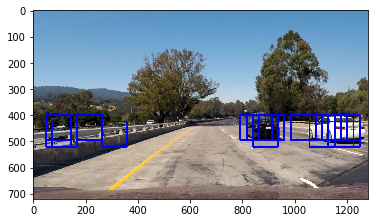

In [12]:
img = mpimg.imread('./test_images/test1.jpg')
y_up = 400
y_end = 656
scale = 1.5
out_img,window_list = find_cars(img, y_up, y_end, scale, svc, ORIENT, PIX_PER_CELL, CELL_PER_BLOCK, spatial_size=(32, 32), hist_bins=32)
plt.imshow(out_img)


/Users/psahay101/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


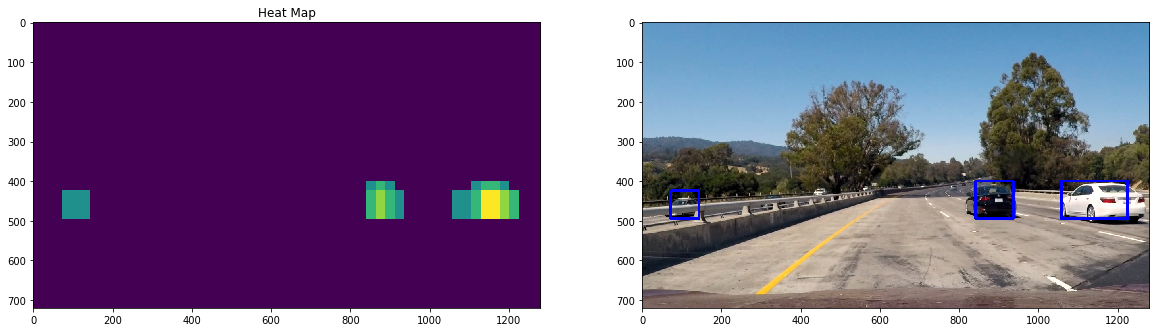

In [13]:
heat = np.zeros_like(img[:,:,0]).astype(np.float)
heat = add_heat(heat,window_list)
heat = apply_threshold(heat, 2)
heatmap = np.clip(heat, 0, 255)
labels = label(heatmap)
raw_image = draw_labeled_bboxes(np.copy(img), labels)

fig = plt.figure(figsize=(20,20))
plt.subplot(223)
plt.subplot(223).set_title('Heat Map')
plt.imshow(heatmap)
plt.subplot(224)

plt.imshow(raw_image)

# Showing yhe example of heat map and the final boxes drawn using the heatmap.

In [14]:
# Defining a class to keep track of the previous frames 
class Vehicles:
    def __init__(self):
        self.bboxes = []
        self.frames = 0
        self.max_frames = 5
    
    def heatmap(self, img, threshold):
        heat = np.zeros_like(img[:,:,0]).astype(np.float)
        for bboxes in self.bboxes:
            heat = add_heat(heat, bboxes)
        
        heat = apply_threshold(heat, threshold)
        return heat
    
    def bbox_new(self, bboxes):
        self.bboxes.append(bboxes)
        if self.frames >= self.max_frames:
            self.bboxes = self.bboxes[8:]
            self.frames = self.frames-1


In [15]:
# Function to generate scale 
def my_func(low,step,leng):
    list = []
    step = step
    for i in range(leng):
        list.append(low)
        low = low + step
    return list

a=my_func(1,0.25,8)
print(a)


[1, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75]


In [20]:
detected_vehicles = Vehicles()

# Create a pipeline to detect cars in video
def pipeline(img, threshold=35):
    # Looking for cars using sliding windows
    scales= my_func(1,0.25,8)
    for scale in (scales):
        out_img,window_list = find_cars(img, y_up, y_end, scale, svc, ORIENT, PIX_PER_CELL, CELL_PER_BLOCK, (32, 32), 32)
        detected_vehicles.bbox_new(window_list)
        
    detected_vehicles.frames +=1
    
    # Find the end locations to draw the box 
    heat = detected_vehicles.heatmap(img, threshold)
    heatmap = np.clip(heat, 0, 255)
    labels = label(heatmap)
    img = draw_labeled_bboxes(img, labels)
    return img


/Users/psahay101/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


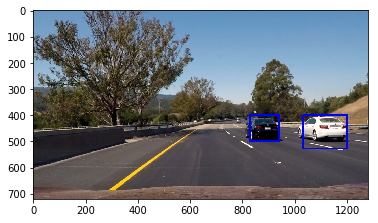

In [21]:
img = mpimg.imread('test6.jpg')
out = pipeline(img, threshold=10)
 
plt.imshow(out)


In [22]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
etected_vehicles = Vehicles()

test = 'test_result5.mp4'
clip1 = VideoFileClip('test_video.mp4')
clip = clip1.fl_image(pipeline)
%time clip.write_videofile(test, audio=False)


[MoviePy] >>>> Building video test_result5.mp4
[MoviePy] Writing video test_result5.mp4


 97%|█████████▋| 38/39 [01:26<00:02,  2.21s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_result5.mp4 

CPU times: user 1min 21s, sys: 2.84 s, total: 1min 24s
Wall time: 1min 27s


In [24]:
detected_vehicles = Vehicles()

result = 'project_result5.mp4'
clip1 = VideoFileClip('project_video.mp4')
clip = clip1.fl_image(pipeline)
%time clip.write_videofile(result, audio=False)

[MoviePy] >>>> Building video project_result5.mp4
[MoviePy] Writing video project_result5.mp4


100%|█████████▉| 1260/1261 [42:36<00:01,  1.99s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_result5.mp4 

CPU times: user 41min 33s, sys: 1min 16s, total: 42min 49s
Wall time: 42min 37s
